In [32]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df=pd.read_csv("WineQT.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.1 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [28]:
df["quality"].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [7]:
df=df.drop("Id",axis=1)

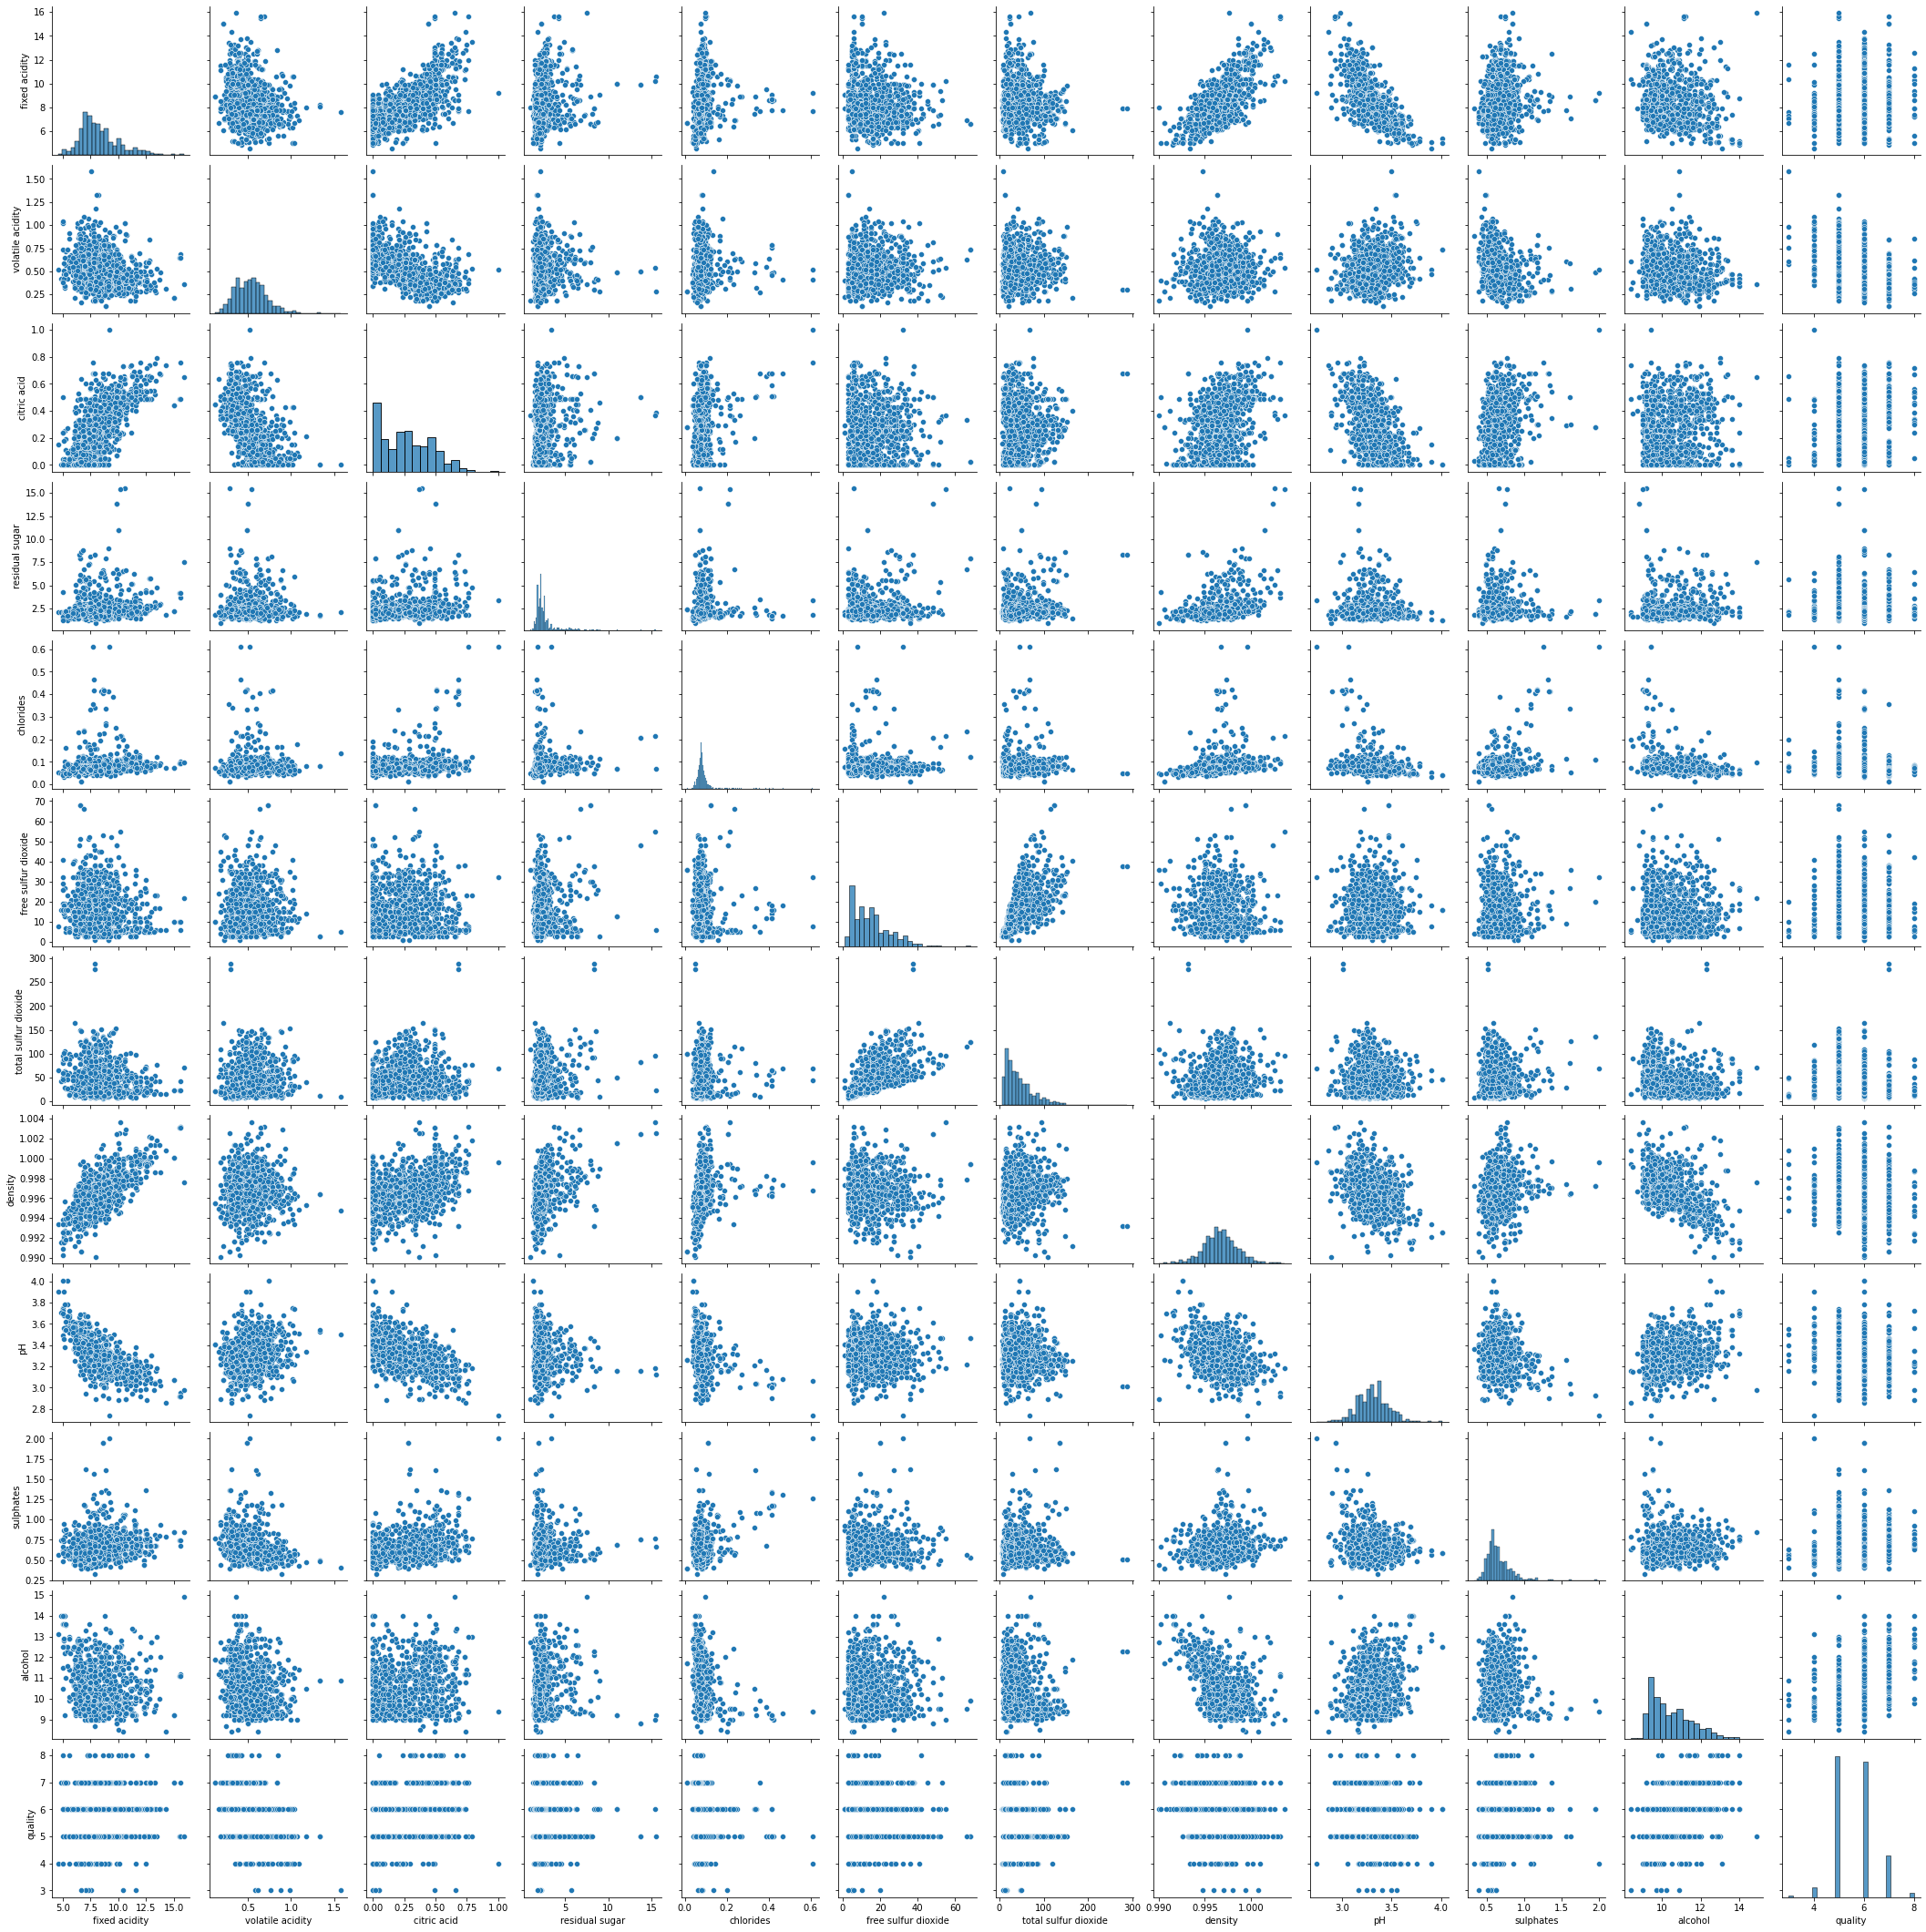

In [15]:
sns.pairplot(data=df)

<AxesSubplot:>

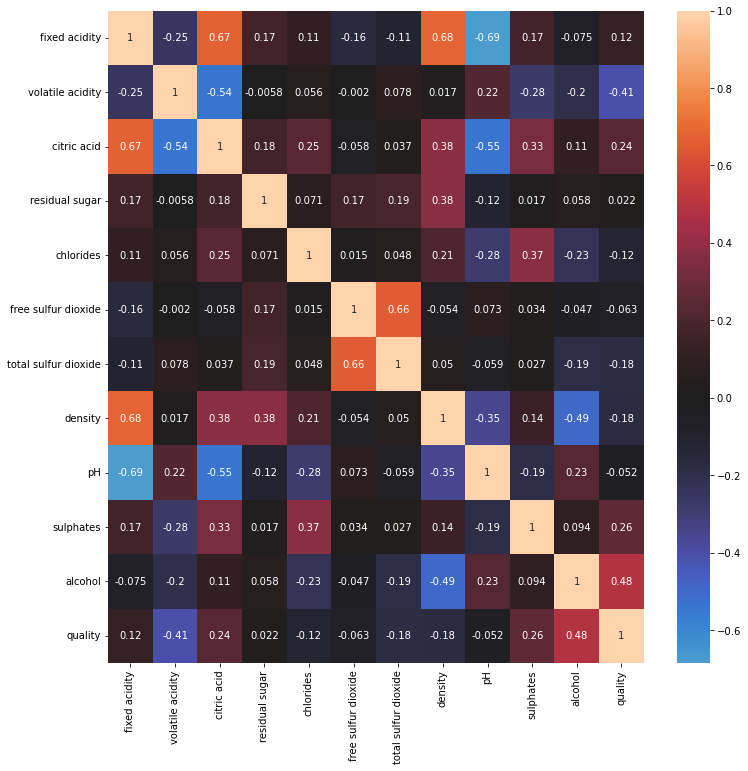

In [22]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),center=0,annot=True)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x=df.drop(["quality"],axis=1)
y=df["quality"]

In [49]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn=KNeighborsClassifier(n_neighbors=6)

In [30]:
knn_predicion=knn.fit(xtrain,ytrain).predict(xtest)

In [33]:
metrics.mean_squared_error(knn_predicion,ytest)

0.8181818181818182

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dtc=DecisionTreeClassifier()

In [36]:
dtc_prediction=dtc.fit(xtrain,ytrain).predict(xtest)

In [37]:
metrics.mean_squared_error(dtc_prediction,ytest)

0.7552447552447552

In [41]:
from sklearn.preprocessing import StandardScaler

In [43]:
std=StandardScaler()

In [52]:
std_x=pd.DataFrame(std.fit_transform(x),columns=df.drop("quality",axis=1).columns)

In [54]:
std_xtrain,std_xtest,std_ytrain,std_ytest=train_test_split(std_x,y)

In [53]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr=LogisticRegression()

In [55]:
lr_prediction=lr.fit(std_xtrain,std_ytrain).predict(std_xtest)

C:\Users\mahyar_fardin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rfc=RandomForestClassifier()

In [58]:
rfc_prediction=rfc.fit(xtrain,ytrain).predict(xtest)

In [59]:
from sklearn.svm import SVC

In [60]:
svm=SVC()

In [62]:
svm_predicion=svm.fit(xtrain,ytrain).predict(xtest)

In [63]:
from sklearn.linear_model import SGDClassifier

In [65]:
sgd=SGDClassifier()

In [66]:
sgd_predicion=sgd.fit(xtrain,ytrain).predict(xtest)

In [67]:
from sklearn.ensemble import AdaBoostClassifier

In [68]:
adbc=AdaBoostClassifier(learning_rate=.5)

In [69]:
adbc_predicion=adbc.fit(xtrain,ytrain).predict(xtest)

In [70]:
print("These are the results: ")
print("knn:")
print(metrics.classification_report(knn_predicion,ytest))
print("------------------------------")
print("dtc:")
print(metrics.classification_report(dtc_prediction,ytest))
print("------------------------------")
print("rfc:")
print(metrics.classification_report(rfc_prediction,ytest))
print("------------------------------")
print("lr:")
print(metrics.classification_report(lr_prediction,ytest))
print("------------------------------")
print("svm:")
print(metrics.classification_report(svm_predicion,ytest))
print("------------------------------")
print("sgd:")
print(metrics.classification_report(sgd_predicion,ytest))
print("------------------------------")
print("adbc:")
print(metrics.classification_report(adbc_predicion,ytest))
print("------------------------------")

These are the results: 
knn:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.55      0.40      0.46       160
           6       0.34      0.42      0.37        98
           7       0.11      0.15      0.13        27
           8       0.00      0.00      0.00         0

    accuracy                           0.38       286
   macro avg       0.17      0.16      0.16       286
weighted avg       0.44      0.38      0.40       286

------------------------------
dtc:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.36      0.38      0.37       110
           6       0.39      0.39      0.39       121
           7       0.20      0.17      0.18        42
           8       0.33      0.20      0.25         5

    accuracy

C:\Users\mahyar_fardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mahyar_fardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mahyar_fardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mahyar_fardin\anaconda3\lib\site-packages\skle